In [2]:
from ultralytics import YOLO
import torch
import pandas as pd
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import random
import shutil
from glob import glob

In [13]:
train_image = "./images/train"
train_label = os.path.join('labels/train')
test_image = os.path.join('images/test')
test_label = os.path.join('labels/test')
val_image = os.path.join('images/val')
val_label = os.path.join('labels/val')

In [3]:
# seed 및 GPU 설정
def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    
set_seed(42)

# Read and sort the file list to ensure consistent order
file_list = sorted(os.listdir(train_image))
random_file = random.choice(file_list).split('.')[0]
print("Image :", random_file)

# Read labels from the file
with open(os.path.join(train_label, f'{random_file}.txt'), 'r') as f:
    labels = f.readlines()
    labels = labels[0].split(' ')

# Read and process the image
img = cv2.imread(os.path.join(train_image, f'{random_file}.jpg'), cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

Image : 00166_259


In [4]:
# 파일 개수 세는 함수
def count_files(directory):
    return len(os.listdir(directory))

num_train_images = count_files(train_image)
num_test_images = count_files(test_image)
num_train_labels = count_files(train_label)
num_test_labels = count_files(test_label)
print(f'Train images: {num_train_images}, Train labels: {num_train_labels}')
print(f'Test images: {num_test_images}, Test labels: {num_test_labels}\n')

Train images: 212, Train labels: 212
Test images: 70, Test labels: 70



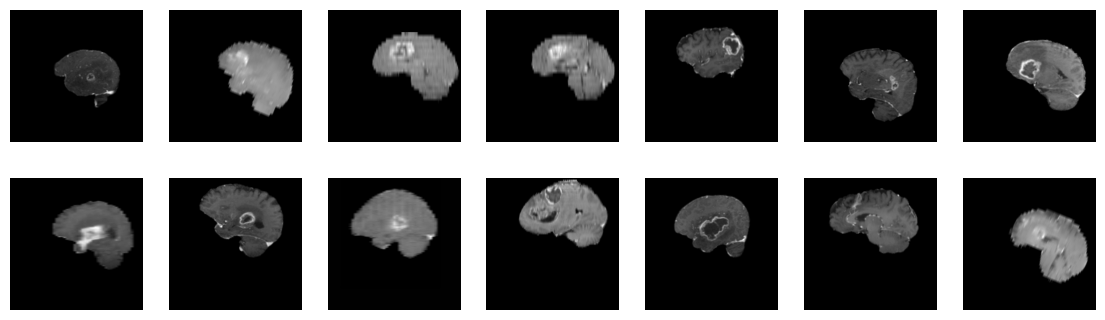

In [20]:
image_files = [os.path.join(train_image, file) for file in os.listdir(train_image) if file.endswith(('jpg', 'jpeg', 'png', 'bmp', 'tiff'))]

# 랜덤으로 14개의 이미지 선택
selected_images = random.sample(image_files, 14)

# 2x7로 이미지 플롯
fig, axs = plt.subplots(2, 7, figsize=(14, 4))

# 이미지 표시
for ax, img_path in zip(axs.flatten(), selected_images):
    img = plt.imread(img_path)
    ax.imshow(img, cmap='gray')
    ax.axis('off')

In [3]:
experiment_name = 'train'
work_name = 'base' #이름수정주의
train_dir = os.path.join('runs', experiment_name, f'{experiment_name}_{work_name}')

if os.path.exists(train_dir):
    shutil.rmtree(train_dir)

model_n = YOLO('yolov8n.pt') #이름수정주의 2개
results_n = model_n.train( #이름수정주의 2개
    data='sagittal_t1wce_2_class.yaml', 
    epochs=200, 
    device=1,  
    name=os.path.join(experiment_name, f'{experiment_name}_{work_name}'),  
    exist_ok=True,
    val=False
)

New https://pypi.org/project/ultralytics/8.2.70 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.0 🚀 Python-3.10.14 torch-2.1.0 CUDA:1 (NVIDIA GeForce RTX 3090, 24260MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=sagittal_t1wce_2_class.yaml, epochs=200, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=1, workers=8, project=None, name=train_base, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=False, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=Fa

train: Scanning /home/under1/Detect/jeongui/sagittal/base/labels/train.cache... 212 images, 0 backgrounds, 0 corrupt: 100%|██████████| 212/212 [00:00<?, ?it/s]
INFO:albumentations.check_version:A new version of Albumentations is available: 1.4.12 (you have 1.4.10). Upgrade using: pip install --upgrade albumentations


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/home/under1/.conda/envs/yolo/lib/python3.10/site-packages/albumentations/core/composition.py:147: UserWarning: Got processor for bboxes, but no transform to process it.
  self._set_keys()
val: Scanning /home/under1/Detect/jeongui/sagittal/base/labels/val.cache... 52 images, 0 backgrounds, 0 corrupt: 100%|██████████| 52/52 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/train_base/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train/train_base
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/200      2.16G      1.877      4.906      1.595          8        640: 100%|██████████| 14/14 [00:03<00:00,  4.42it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/200      2.17G      1.565      3.658      1.314         14        640: 100%|██████████| 14/14 [00:01<00:00,  7.50it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/200      2.17G      1.315      2.896      1.229          6        640: 100%|██████████| 14/14 [00:01<00:00,  7.21it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/200      2.18G       1.44      2.906       1.24          6        640: 100%|██████████| 14/14 [00:01<00:00,  7.41it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/200      2.17G      1.451      2.613      1.259          6        640: 100%|██████████| 14/14 [00:01<00:00,  7.58it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/200      2.18G      1.277      2.515      1.158         12        640: 100%|██████████| 14/14 [00:01<00:00,  7.63it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/200      2.18G      1.198      2.378       1.15          6        640: 100%|██████████| 14/14 [00:01<00:00,  7.79it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/200      2.18G      1.335      2.375       1.18         12        640: 100%|██████████| 14/14 [00:01<00:00,  8.45it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/200      2.14G      1.203      2.078      1.129         12        640: 100%|██████████| 14/14 [00:01<00:00,  8.13it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/200      2.13G      1.293      2.196      1.209          7        640: 100%|██████████| 14/14 [00:01<00:00,  7.66it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/200      2.14G      1.347      2.024      1.243          7        640: 100%|██████████| 14/14 [00:01<00:00,  7.70it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/200      2.14G      1.277      1.888      1.174         10        640: 100%|██████████| 14/14 [00:01<00:00,  8.68it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/200      2.14G      1.262       1.82       1.17         13        640: 100%|██████████| 14/14 [00:01<00:00,  7.80it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/200      2.13G      1.283      1.857      1.195          7        640: 100%|██████████| 14/14 [00:01<00:00,  7.55it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/200      2.14G       1.16      1.726      1.129         10        640: 100%|██████████| 14/14 [00:01<00:00,  7.58it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/200      2.14G      1.263      1.675      1.164          7        640: 100%|██████████| 14/14 [00:01<00:00,  7.59it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/200      2.14G      1.245      1.663      1.169          9        640: 100%|██████████| 14/14 [00:01<00:00,  7.74it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/200      2.14G      1.166      1.651      1.134          7        640: 100%|██████████| 14/14 [00:01<00:00,  7.35it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/200      2.13G      1.224      1.732       1.14          2        640: 100%|██████████| 14/14 [00:01<00:00,  7.39it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/200      2.13G      1.141      1.565      1.094          6        640: 100%|██████████| 14/14 [00:01<00:00,  7.41it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/200      2.13G      1.169      1.538      1.155          4        640: 100%|██████████| 14/14 [00:01<00:00,  7.71it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/200      2.14G      1.097      1.513       1.09         10        640: 100%|██████████| 14/14 [00:01<00:00,  7.59it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/200      2.14G       1.14      1.473      1.118         11        640: 100%|██████████| 14/14 [00:01<00:00,  7.63it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/200      2.13G       1.13      1.496        1.1          6        640: 100%|██████████| 14/14 [00:01<00:00,  7.75it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/200      2.13G      1.061      1.418      1.071          5        640: 100%|██████████| 14/14 [00:01<00:00,  7.81it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/200      2.14G       1.09      1.421      1.114          7        640: 100%|██████████| 14/14 [00:01<00:00,  7.55it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/200      2.14G      1.114       1.41      1.121         10        640: 100%|██████████| 14/14 [00:01<00:00,  7.75it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/200      2.13G      1.117      1.403      1.089          8        640: 100%|██████████| 14/14 [00:01<00:00,  7.47it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/200      2.14G      1.079      1.414      1.082          8        640: 100%|██████████| 14/14 [00:01<00:00,  7.58it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/200      2.13G      1.077      1.379      1.116          5        640: 100%|██████████| 14/14 [00:01<00:00,  7.51it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/200      2.13G      1.029      1.381      1.071          5        640: 100%|██████████| 14/14 [00:01<00:00,  7.75it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/200      2.13G      1.067      1.347       1.08          6        640: 100%|██████████| 14/14 [00:01<00:00,  7.58it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/200      2.13G      1.066      1.285      1.069          6        640: 100%|██████████| 14/14 [00:01<00:00,  7.72it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/200      2.13G      1.003      1.271      1.051          7        640: 100%|██████████| 14/14 [00:01<00:00,  7.59it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/200      2.13G      1.044      1.306      1.107          1        640: 100%|██████████| 14/14 [00:01<00:00,  7.76it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/200      2.13G      0.986      1.196      1.056          4        640: 100%|██████████| 14/14 [00:01<00:00,  7.51it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/200      2.14G       1.05      1.244      1.033          9        640: 100%|██████████| 14/14 [00:01<00:00,  7.65it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/200      2.13G       1.01      1.241      1.029          6        640: 100%|██████████| 14/14 [00:01<00:00,  7.56it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/200      2.13G     0.9972       1.22      1.041          6        640: 100%|██████████| 14/14 [00:01<00:00,  7.87it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/200      2.14G      1.028      1.208       1.06         11        640: 100%|██████████| 14/14 [00:01<00:00,  7.91it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/200      2.13G      1.077      1.235      1.064          4        640: 100%|██████████| 14/14 [00:01<00:00,  7.74it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/200      2.14G     0.9892      1.178      1.039          8        640: 100%|██████████| 14/14 [00:01<00:00,  8.61it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/200      2.14G     0.9722      1.187      1.059          5        640: 100%|██████████| 14/14 [00:01<00:00,  9.18it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/200      2.13G     0.9079      1.164      1.022          6        640: 100%|██████████| 14/14 [00:01<00:00,  7.56it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/200      2.14G     0.9341      1.139       1.01          8        640: 100%|██████████| 14/14 [00:01<00:00,  7.69it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/200      2.13G     0.9689       1.15      1.014          6        640: 100%|██████████| 14/14 [00:01<00:00,  7.72it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/200      2.14G      1.032      1.163       1.05          9        640: 100%|██████████| 14/14 [00:01<00:00,  7.88it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/200      2.14G      1.033      1.176      1.079          7        640: 100%|██████████| 14/14 [00:01<00:00,  8.20it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/200      2.14G     0.9319      1.159      1.026          8        640: 100%|██████████| 14/14 [00:01<00:00,  7.44it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/200      2.13G       0.93      1.105      1.014          6        640: 100%|██████████| 14/14 [00:01<00:00,  7.41it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/200      2.13G     0.9661      1.154      1.036          4        640: 100%|██████████| 14/14 [00:01<00:00,  7.15it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/200      2.14G     0.9723      1.158      1.034          9        640: 100%|██████████| 14/14 [00:01<00:00,  7.44it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/200      2.13G     0.9381      1.111      1.037          6        640: 100%|██████████| 14/14 [00:01<00:00,  7.43it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/200      2.14G      0.918      1.032      1.018          9        640: 100%|██████████| 14/14 [00:01<00:00,  7.22it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/200      2.13G      0.916      1.044      1.023          5        640: 100%|██████████| 14/14 [00:01<00:00,  7.67it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/200      2.14G     0.9386      1.091      1.015          9        640: 100%|██████████| 14/14 [00:01<00:00,  7.39it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/200      2.13G     0.9215      1.066     0.9954          4        640: 100%|██████████| 14/14 [00:01<00:00,  7.53it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/200      2.13G      0.956      1.106      1.038          7        640: 100%|██████████| 14/14 [00:01<00:00,  7.60it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/200      2.13G     0.9482      1.095      1.032          3        640: 100%|██████████| 14/14 [00:01<00:00,  7.68it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/200      2.13G     0.9263      1.081      1.026          8        640: 100%|██████████| 14/14 [00:01<00:00,  7.50it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/200      2.14G     0.9164      1.078      1.014          8        640: 100%|██████████| 14/14 [00:01<00:00,  7.50it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/200      2.14G     0.9323      1.074      0.982          9        640: 100%|██████████| 14/14 [00:01<00:00,  7.18it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/200      2.14G     0.9436      1.043      1.037          8        640: 100%|██████████| 14/14 [00:01<00:00,  7.64it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/200      2.13G      0.971      1.091      1.057          4        640: 100%|██████████| 14/14 [00:01<00:00,  7.34it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/200      2.13G      0.951      1.058      1.017          9        640: 100%|██████████| 14/14 [00:01<00:00,  7.76it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/200      2.13G      0.927      1.029      1.016          6        640: 100%|██████████| 14/14 [00:01<00:00,  7.70it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/200      2.14G     0.8632      1.002      1.002          7        640: 100%|██████████| 14/14 [00:01<00:00,  7.82it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/200      2.14G     0.9098      1.002      1.017          7        640: 100%|██████████| 14/14 [00:01<00:00,  7.74it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/200      2.13G     0.8632     0.9624     0.9878          6        640: 100%|██████████| 14/14 [00:01<00:00,  7.58it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/200      2.13G     0.8912      1.004      1.008          6        640: 100%|██████████| 14/14 [00:01<00:00,  7.48it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/200      2.13G     0.8281     0.9603      1.013          5        640: 100%|██████████| 14/14 [00:01<00:00,  7.69it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/200      2.13G      0.889     0.9613      1.002          5        640: 100%|██████████| 14/14 [00:01<00:00,  7.30it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/200      2.13G     0.9109     0.9904      1.001          7        640: 100%|██████████| 14/14 [00:01<00:00,  7.73it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/200      2.14G     0.8787     0.9823      1.011          7        640: 100%|██████████| 14/14 [00:01<00:00,  7.64it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/200      2.14G     0.8571     0.9367     0.9723          9        640: 100%|██████████| 14/14 [00:01<00:00,  7.77it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/200      2.13G     0.8603       0.96          1          7        640: 100%|██████████| 14/14 [00:01<00:00,  7.51it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/200      2.13G     0.8017     0.8627     0.9676          3        640: 100%|██████████| 14/14 [00:01<00:00,  8.90it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/200      2.13G      0.897     0.9155      1.002          8        640: 100%|██████████| 14/14 [00:01<00:00,  7.89it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/200      2.13G     0.8498     0.8624     0.9622          5        640: 100%|██████████| 14/14 [00:01<00:00,  7.80it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/200      2.13G     0.8318     0.8642     0.9786          5        640: 100%|██████████| 14/14 [00:01<00:00,  7.52it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/200      2.13G     0.8892     0.8426      1.017          3        640: 100%|██████████| 14/14 [00:01<00:00,  7.51it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/200      2.13G     0.8005     0.8258     0.9631          5        640: 100%|██████████| 14/14 [00:01<00:00,  7.59it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/200      2.13G     0.8043     0.7647     0.9683          6        640: 100%|██████████| 14/14 [00:01<00:00,  7.71it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/200      2.14G      0.835     0.7876     0.9812          8        640: 100%|██████████| 14/14 [00:01<00:00,  7.46it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/200      2.13G      0.813     0.8067     0.9694          5        640: 100%|██████████| 14/14 [00:01<00:00,  7.45it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/200      2.14G     0.8287     0.8776     0.9705          9        640: 100%|██████████| 14/14 [00:01<00:00,  7.51it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/200      2.14G     0.7765     0.7872     0.9739          7        640: 100%|██████████| 14/14 [00:01<00:00,  7.69it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/200      2.13G     0.7907     0.8245      0.966          8        640: 100%|██████████| 14/14 [00:01<00:00,  7.53it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/200      2.14G     0.8154     0.7892     0.9777         13        640: 100%|██████████| 14/14 [00:01<00:00,  7.70it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/200      2.13G      0.791     0.7758     0.9612          4        640: 100%|██████████| 14/14 [00:01<00:00,  7.68it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/200      2.13G     0.7965     0.8002     0.9528          5        640: 100%|██████████| 14/14 [00:01<00:00,  7.82it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/200      2.13G      0.792      0.718     0.9635          4        640: 100%|██████████| 14/14 [00:01<00:00,  7.47it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/200      2.14G      0.807     0.7358     0.9605          8        640: 100%|██████████| 14/14 [00:01<00:00,  7.74it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/200      2.14G     0.7647     0.7836     0.9679          8        640: 100%|██████████| 14/14 [00:01<00:00,  7.66it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/200      2.13G     0.8059     0.7477       0.97          4        640: 100%|██████████| 14/14 [00:01<00:00,  7.40it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/200      2.14G     0.7541     0.7211      0.938          7        640: 100%|██████████| 14/14 [00:01<00:00,  7.54it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/200      2.14G     0.8344     0.7449     0.9882          7        640: 100%|██████████| 14/14 [00:01<00:00,  7.49it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/200      2.13G      0.731       0.67     0.9408          4        640: 100%|██████████| 14/14 [00:01<00:00,  7.73it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/200      2.13G     0.7766     0.7389     0.9655          6        640: 100%|██████████| 14/14 [00:01<00:00,  7.72it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/200      2.13G     0.7519      0.644     0.9523          5        640: 100%|██████████| 14/14 [00:01<00:00,  7.53it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/200      2.13G     0.7661     0.6593     0.9249          4        640: 100%|██████████| 14/14 [00:01<00:00,  7.72it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/200      2.13G     0.7414     0.6611     0.9591          5        640: 100%|██████████| 14/14 [00:01<00:00,  7.47it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/200      2.14G     0.7969     0.6856     0.9618         12        640: 100%|██████████| 14/14 [00:01<00:00,  7.73it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/200      2.14G     0.7653     0.6641     0.9598          8        640: 100%|██████████| 14/14 [00:01<00:00,  7.60it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/200      2.13G     0.7464     0.7038     0.9374          3        640: 100%|██████████| 14/14 [00:01<00:00,  7.46it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/200      2.13G     0.7142     0.6627     0.9517          5        640: 100%|██████████| 14/14 [00:01<00:00,  7.58it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/200      2.13G     0.7688     0.7125      0.973          6        640: 100%|██████████| 14/14 [00:01<00:00,  7.63it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/200      2.13G     0.7493     0.6326     0.9405          7        640: 100%|██████████| 14/14 [00:01<00:00,  7.31it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/200      2.13G     0.7095     0.6295     0.9317          5        640: 100%|██████████| 14/14 [00:01<00:00,  7.56it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/200      2.13G      0.704     0.6163     0.9394          5        640: 100%|██████████| 14/14 [00:01<00:00,  7.31it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/200      2.13G     0.6914     0.6508      0.919          6        640: 100%|██████████| 14/14 [00:01<00:00,  7.80it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/200      2.14G     0.7224     0.6372     0.9384         10        640: 100%|██████████| 14/14 [00:01<00:00,  7.45it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/200      2.14G     0.7405     0.6397     0.9372          6        640: 100%|██████████| 14/14 [00:01<00:00,  7.56it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/200      2.14G     0.7458     0.6271      0.938         10        640: 100%|██████████| 14/14 [00:01<00:00,  7.39it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/200      2.14G     0.6934     0.6191     0.9036          8        640: 100%|██████████| 14/14 [00:01<00:00,  7.39it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/200      2.13G     0.7331      0.596     0.9448          7        640: 100%|██████████| 14/14 [00:01<00:00,  7.48it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/200      2.13G     0.7401     0.6382      0.968          5        640: 100%|██████████| 14/14 [00:01<00:00,  8.39it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/200      2.13G     0.6747     0.5486     0.9392          6        640: 100%|██████████| 14/14 [00:01<00:00,  7.67it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/200      2.14G     0.6952     0.6045     0.9241          9        640: 100%|██████████| 14/14 [00:02<00:00,  6.70it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/200      2.13G     0.7219     0.6082     0.9614          5        640: 100%|██████████| 14/14 [00:01<00:00,  7.31it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/200      2.13G     0.7042     0.5918     0.9403          7        640: 100%|██████████| 14/14 [00:01<00:00,  7.59it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/200      2.14G     0.6927     0.5538     0.9437         10        640: 100%|██████████| 14/14 [00:01<00:00,  7.60it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/200      2.13G     0.6615     0.5524     0.9099          7        640: 100%|██████████| 14/14 [00:01<00:00,  7.78it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/200      2.13G     0.7255     0.6225     0.9219          6        640: 100%|██████████| 14/14 [00:01<00:00,  7.70it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/200      2.13G     0.6862     0.5524     0.9253          4        640: 100%|██████████| 14/14 [00:01<00:00,  7.70it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/200      2.14G     0.6486     0.5579     0.9055          7        640: 100%|██████████| 14/14 [00:01<00:00,  7.52it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/200      2.14G     0.6863     0.5469     0.9151          6        640: 100%|██████████| 14/14 [00:01<00:00,  7.77it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/200      2.13G     0.7091     0.5691     0.9441          4        640: 100%|██████████| 14/14 [00:01<00:00,  7.61it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/200      2.14G     0.6704     0.6124      0.916          6        640: 100%|██████████| 14/14 [00:01<00:00,  7.67it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/200      2.14G      0.706     0.5977     0.9545          9        640: 100%|██████████| 14/14 [00:01<00:00,  7.52it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/200      2.14G     0.6638     0.5204     0.9146          5        640: 100%|██████████| 14/14 [00:01<00:00,  7.70it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/200      2.13G     0.6626     0.5577     0.9199          6        640: 100%|██████████| 14/14 [00:01<00:00,  7.65it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/200      2.14G     0.6734     0.5646     0.9317          8        640: 100%|██████████| 14/14 [00:01<00:00,  7.70it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/200      2.13G     0.6427     0.5157     0.9078          6        640: 100%|██████████| 14/14 [00:01<00:00,  7.82it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/200      2.13G     0.6365     0.5323      0.898          6        640: 100%|██████████| 14/14 [00:01<00:00,  7.68it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/200      2.14G     0.6179     0.5432     0.9046          6        640: 100%|██████████| 14/14 [00:01<00:00,  7.69it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/200      2.13G     0.6604     0.4986     0.9319          6        640: 100%|██████████| 14/14 [00:01<00:00,  7.83it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/200      2.14G     0.6736     0.5395     0.9213          7        640: 100%|██████████| 14/14 [00:01<00:00,  7.63it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/200      2.13G      0.644     0.5596     0.9164          5        640: 100%|██████████| 14/14 [00:01<00:00,  7.85it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/200      2.13G     0.7351      0.587     0.9609          3        640: 100%|██████████| 14/14 [00:01<00:00,  7.57it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/200      2.14G     0.6617     0.4891       0.91         10        640: 100%|██████████| 14/14 [00:01<00:00,  7.67it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/200      2.13G     0.6619     0.5396     0.9448          4        640: 100%|██████████| 14/14 [00:01<00:00,  7.47it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/200      2.13G     0.6357     0.5119     0.9141          6        640: 100%|██████████| 14/14 [00:01<00:00,  7.59it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/200      2.14G     0.7037     0.5246     0.9476          9        640: 100%|██████████| 14/14 [00:01<00:00,  7.59it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/200      2.14G     0.6484      0.493     0.9093         12        640: 100%|██████████| 14/14 [00:01<00:00,  7.62it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/200      2.14G      0.645     0.5048     0.9004          7        640: 100%|██████████| 14/14 [00:01<00:00,  8.80it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/200      2.13G      0.606     0.4763      0.898          3        640: 100%|██████████| 14/14 [00:01<00:00,  7.85it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/200      2.14G     0.6198     0.4593     0.9039          6        640: 100%|██████████| 14/14 [00:01<00:00,  7.31it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/200      2.13G     0.6227     0.4585     0.9127          6        640: 100%|██████████| 14/14 [00:01<00:00,  7.91it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/200      2.13G      0.603     0.4572     0.8935          6        640: 100%|██████████| 14/14 [00:01<00:00,  7.16it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/200      2.13G     0.6304     0.4819     0.9197          5        640: 100%|██████████| 14/14 [00:01<00:00,  7.89it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/200      2.14G      0.581     0.4667     0.8851         10        640: 100%|██████████| 14/14 [00:01<00:00,  8.79it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/200      2.13G     0.6014     0.4543     0.8999          5        640: 100%|██████████| 14/14 [00:01<00:00,  7.73it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/200      2.13G     0.6066     0.4851     0.8938          6        640: 100%|██████████| 14/14 [00:01<00:00,  7.58it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/200      2.13G     0.6198     0.4789     0.9122          4        640: 100%|██████████| 14/14 [00:01<00:00,  7.53it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/200      2.13G     0.5788     0.4552     0.8945          4        640: 100%|██████████| 14/14 [00:01<00:00,  7.58it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/200      2.13G     0.6043     0.4948     0.9032          5        640: 100%|██████████| 14/14 [00:01<00:00,  7.75it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/200      2.13G     0.5984     0.4799     0.8966          6        640: 100%|██████████| 14/14 [00:01<00:00,  7.76it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/200      2.13G      0.635     0.4878     0.9001          4        640: 100%|██████████| 14/14 [00:01<00:00,  7.93it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/200      2.13G     0.6088     0.4704       0.92          5        640: 100%|██████████| 14/14 [00:01<00:00,  7.64it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/200      2.13G     0.5809       0.45     0.8836          6        640: 100%|██████████| 14/14 [00:01<00:00,  7.95it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/200      2.13G     0.6278     0.4974     0.9074          5        640: 100%|██████████| 14/14 [00:01<00:00,  7.77it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/200      2.13G     0.5454     0.4613     0.8745          9        640: 100%|██████████| 14/14 [00:01<00:00,  7.92it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/200      2.13G     0.5969     0.4564     0.9341          4        640: 100%|██████████| 14/14 [00:01<00:00,  7.63it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/200      2.14G     0.5682     0.4359     0.8977         11        640: 100%|██████████| 14/14 [00:01<00:00,  7.90it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/200      2.14G     0.5953     0.4637     0.9191          8        640: 100%|██████████| 14/14 [00:01<00:00,  7.96it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/200      2.13G     0.5986     0.4484     0.9056          4        640: 100%|██████████| 14/14 [00:01<00:00,  7.97it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/200      2.13G     0.5549      0.421      0.881          6        640: 100%|██████████| 14/14 [00:01<00:00,  7.68it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/200      2.13G     0.5763     0.4357     0.9032          3        640: 100%|██████████| 14/14 [00:01<00:00,  7.73it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/200      2.13G     0.5933     0.4483     0.9032          6        640: 100%|██████████| 14/14 [00:01<00:00,  7.59it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/200      2.13G     0.5259     0.4138     0.8816          4        640: 100%|██████████| 14/14 [00:01<00:00,  7.61it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/200      2.13G     0.5762     0.4351     0.8869          6        640: 100%|██████████| 14/14 [00:01<00:00,  7.46it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/200      2.13G      0.527      0.392     0.8928          4        640: 100%|██████████| 14/14 [00:01<00:00,  7.71it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/200      2.13G     0.5557      0.411     0.8851          6        640: 100%|██████████| 14/14 [00:01<00:00,  7.52it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/200      2.14G     0.4981     0.4022     0.8734          8        640: 100%|██████████| 14/14 [00:01<00:00,  7.67it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/200      2.14G     0.5811       0.44     0.9083          7        640: 100%|██████████| 14/14 [00:01<00:00,  7.55it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/200      2.13G     0.5307     0.3913     0.8741          7        640: 100%|██████████| 14/14 [00:01<00:00,  7.66it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/200      2.14G     0.5421     0.3962      0.912          6        640: 100%|██████████| 14/14 [00:01<00:00,  7.85it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/200      2.13G      0.528     0.3988     0.8771          3        640: 100%|██████████| 14/14 [00:01<00:00,  7.50it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/200      2.14G     0.5396      0.406     0.8737          7        640: 100%|██████████| 14/14 [00:01<00:00,  8.00it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/200      2.13G     0.5318     0.4072      0.881         10        640: 100%|██████████| 14/14 [00:01<00:00,  8.75it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/200      2.13G     0.5345     0.4075     0.8908          5        640: 100%|██████████| 14/14 [00:02<00:00,  6.59it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/200      2.13G     0.5192     0.4103      0.883          1        640: 100%|██████████| 14/14 [00:01<00:00,  7.60it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/200      2.14G     0.5264     0.3861     0.8811          6        640: 100%|██████████| 14/14 [00:01<00:00,  7.54it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/200      2.14G     0.5154     0.3957     0.8847          9        640: 100%|██████████| 14/14 [00:01<00:00,  7.73it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/200      2.13G     0.5439     0.3894     0.8901          6        640: 100%|██████████| 14/14 [00:01<00:00,  7.59it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/200      2.14G      0.512     0.4034     0.8818         10        640: 100%|██████████| 14/14 [00:01<00:00,  8.45it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/200      2.14G     0.4921     0.3834     0.8734          6        640: 100%|██████████| 14/14 [00:01<00:00,  8.49it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/200      2.13G     0.5239     0.3607     0.8682          5        640: 100%|██████████| 14/14 [00:01<00:00,  7.58it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/200      2.14G     0.5175      0.402     0.8695         12        640: 100%|██████████| 14/14 [00:01<00:00,  7.42it/s]


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/home/under1/.conda/envs/yolo/lib/python3.10/site-packages/albumentations/core/composition.py:147: UserWarning: Got processor for bboxes, but no transform to process it.
  self._set_keys()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/200      2.13G     0.4819     0.3393     0.8415          6        640: 100%|██████████| 14/14 [00:02<00:00,  6.12it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/200      2.13G     0.4437     0.3208     0.8373          4        640: 100%|██████████| 14/14 [00:01<00:00,  7.40it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/200      2.13G      0.449     0.3117     0.8248          4        640: 100%|██████████| 14/14 [00:01<00:00,  7.87it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/200      2.13G     0.4208     0.3117     0.8262          4        640: 100%|██████████| 14/14 [00:01<00:00,  7.32it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/200      2.13G     0.4325     0.3094     0.8273          4        640: 100%|██████████| 14/14 [00:01<00:00,  7.90it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/200      2.13G     0.4288     0.2914     0.8301          4        640: 100%|██████████| 14/14 [00:01<00:00,  7.68it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/200      2.13G     0.4211     0.2831     0.8373          5        640: 100%|██████████| 14/14 [00:01<00:00,  8.13it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/200      2.13G      0.427     0.2951     0.8503          4        640: 100%|██████████| 14/14 [00:01<00:00,  7.78it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/200      2.13G     0.4107     0.2963     0.8267          4        640: 100%|██████████| 14/14 [00:01<00:00,  7.77it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/200      2.13G     0.4106     0.2787     0.8199          4        640: 100%|██████████| 14/14 [00:02<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.06it/s]


                   all         52         54      0.584      0.783      0.713      0.534

200 epochs completed in 0.136 hours.
Optimizer stripped from runs/detect/train/train_base/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/train_base/weights/best.pt, 6.3MB

Validating runs/detect/train/train_base/weights/best.pt...
Ultralytics YOLOv8.2.0 🚀 Python-3.10.14 torch-2.1.0 CUDA:1 (NVIDIA GeForce RTX 3090, 24260MiB)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.94it/s]


                   all         52         54      0.575        0.8      0.711      0.532
              negative         52         30      0.674      0.767      0.776      0.625
              positive         52         24      0.476      0.833      0.645       0.44
Speed: 0.3ms preprocess, 0.9ms inference, 0.0ms loss, 2.5ms postprocess per image
Results saved to runs/detect/train/train_base


In [4]:
results_n.results_dict

{'metrics/precision(B)': 0.5752366119459821,
 'metrics/recall(B)': 0.8,
 'metrics/mAP50(B)': 0.7105530388383935,
 'metrics/mAP50-95(B)': 0.5323684642232831,
 'fitness': 0.5501869216847941}

In [5]:
experiment_name = 'train'
work_name = 'base' #이름수정주의
train_dir = os.path.join('runs', experiment_name)

if os.path.exists(train_dir):
    shutil.rmtree(train_dir)

train_model = YOLO("/home/under1/Detect/jeongui/sagittal/base/runs/detect/train/train_base/weights/best.pt")
train_model.val(name=os.path.join(experiment_name, f'{experiment_name}_{work_name}'), split="train")

Ultralytics YOLOv8.2.0 🚀 Python-3.10.14 torch-2.1.0 CUDA:0 (NVIDIA GeForce RTX 3090, 24260MiB)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /home/under1/Detect/jeongui/sagittal/base/labels/train.cache... 212 images, 0 backgrounds, 0 corrupt: 100%|██████████| 212/212 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.46it/s]


                   all        212        225      0.999          1      0.995      0.952
              negative        212        109      0.999          1      0.995      0.957
              positive        212        116          1          1      0.995      0.947
Speed: 0.4ms preprocess, 5.0ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to runs/detect/train/train_base2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f63a7ea0f40>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [6]:
experiment_name = 'val'
work_name = 'base' #이름수정주의
train_dir = os.path.join('runs', experiment_name)

if os.path.exists(train_dir):
    shutil.rmtree(train_dir)

train_model.val(name=os.path.join(experiment_name, f'{experiment_name}_{work_name}'), split="val")

Ultralytics YOLOv8.2.0 🚀 Python-3.10.14 torch-2.1.0 CUDA:0 (NVIDIA GeForce RTX 3090, 24260MiB)


val: Scanning /home/under1/Detect/jeongui/sagittal/base/labels/val.cache... 52 images, 0 backgrounds, 0 corrupt: 100%|██████████| 52/52 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:21<00:00,  5.45s/it]


                   all         52         54       0.58      0.793      0.715      0.537
              negative         52         30      0.672      0.752      0.779      0.627
              positive         52         24      0.489      0.833      0.651      0.448
Speed: 0.5ms preprocess, 2.5ms inference, 0.0ms loss, 3.1ms postprocess per image
Results saved to runs/detect/val/val_base


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f63a7b974f0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [7]:
experiment_name = 'test'
work_name = 'base' #이름수정주의
train_dir = os.path.join('runs', experiment_name)

if os.path.exists(train_dir):
    shutil.rmtree(train_dir)

train_model.val(name=os.path.join(experiment_name, f'{experiment_name}_{work_name}'), split="test")

Ultralytics YOLOv8.2.0 🚀 Python-3.10.14 torch-2.1.0 CUDA:0 (NVIDIA GeForce RTX 3090, 24260MiB)


val: Scanning /home/under1/Detect/jeongui/sagittal/base/labels/test.cache... 70 images, 0 backgrounds, 0 corrupt: 100%|██████████| 70/70 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [02:34<00:00, 31.00s/it]


                   all         70         77      0.453      0.639      0.536      0.412
              negative         70         39      0.539       0.41      0.479      0.342
              positive         70         38      0.368      0.868      0.594      0.483
Speed: 0.4ms preprocess, 7.9ms inference, 0.0ms loss, 3.2ms postprocess per image
Results saved to runs/detect/test/test_base


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f62ada3a0b0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [43]:
print(results_n.box.all_ap)
print(results_n.box.p)
print(results_n.box.r)
print(results_n.box.f1)

[[    0.81444     0.81444     0.81444     0.81444     0.81444     0.74854     0.69579     0.56233     0.52874   0.0090089]
 [    0.64309     0.64309     0.60909     0.60909     0.60909     0.55482     0.44316     0.26733     0.20915    0.034245]]
[    0.74308     0.58878]
[    0.77141     0.65652]
[    0.75698      0.6208]


In [33]:
test_image = 'images/val'
predict_results = train_model.predict(test_image, save=True, save_dir='./runs/detect/predict_test')


image 1/52 /home/under1/Detect/jeongui/sagittal/base/images/val/00060_69.jpg: 640x640 1 positive, 8.9ms
image 2/52 /home/under1/Detect/jeongui/sagittal/base/images/val/00060_70.jpg: 640x640 1 positive, 8.3ms
image 3/52 /home/under1/Detect/jeongui/sagittal/base/images/val/00064_121.jpg: 640x640 1 negative, 1 positive, 8.2ms
image 4/52 /home/under1/Detect/jeongui/sagittal/base/images/val/00064_140.jpg: 640x640 1 positive, 8.2ms
image 5/52 /home/under1/Detect/jeongui/sagittal/base/images/val/00066_145.jpg: 640x640 1 positive, 8.2ms
image 6/52 /home/under1/Detect/jeongui/sagittal/base/images/val/00074_229.jpg: 640x640 1 positive, 8.1ms
image 7/52 /home/under1/Detect/jeongui/sagittal/base/images/val/00074_289.jpg: 640x640 1 positive, 8.6ms
image 8/52 /home/under1/Detect/jeongui/sagittal/base/images/val/00077_246.jpg: 640x640 1 positive, 8.2ms
image 9/52 /home/under1/Detect/jeongui/sagittal/base/images/val/00078_239.jpg: 640x640 1 positive, 6.3ms
image 10/52 /home/under1/Detect/jeongui/sagi

In [58]:
for r in predict_results:
    print(r.boxes.conf, r.boxes.cls, r.path)

tensor([0.9013], device='cuda:0') tensor([1.], device='cuda:0') /home/under1/Detect/jeongui/sagittal/base/images/test/00000_102.jpg
tensor([0.9383], device='cuda:0') tensor([1.], device='cuda:0') /home/under1/Detect/jeongui/sagittal/base/images/test/00000_121.jpg
tensor([0.9438], device='cuda:0') tensor([1.], device='cuda:0') /home/under1/Detect/jeongui/sagittal/base/images/test/00000_140.jpg
tensor([0.9435], device='cuda:0') tensor([1.], device='cuda:0') /home/under1/Detect/jeongui/sagittal/base/images/test/00000_159.jpg
tensor([0.8476], device='cuda:0') tensor([1.], device='cuda:0') /home/under1/Detect/jeongui/sagittal/base/images/test/00002_110.jpg
tensor([0.9153], device='cuda:0') tensor([1.], device='cuda:0') /home/under1/Detect/jeongui/sagittal/base/images/test/00002_129.jpg
tensor([0.9039], device='cuda:0') tensor([1.], device='cuda:0') /home/under1/Detect/jeongui/sagittal/base/images/test/00002_147.jpg
tensor([0.9035], device='cuda:0') tensor([1.], device='cuda:0') /home/under1